Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


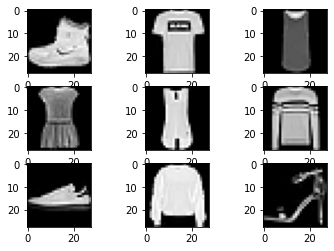

In [6]:

# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [7]:
#reshaping the image
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [8]:
from keras.utils import to_categorical
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [10]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
	# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [14]:
history = model.fit(train_norm,trainY ,epochs=10, 
                    validation_data=(test_norm, testY))

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.4168 - accuracy: 0.8501 - val_loss: 0.3422 - val_accuracy: 0.8767
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2833 - accuracy: 0.8975 - val_loss: 0.2966 - val_accuracy: 0.8942
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2425 - accuracy: 0.9105 - val_loss: 0.2948 - val_accuracy: 0.8940
Epoch 4/10
1875/1875 [==============================] - 38s 21ms/step - loss: 0.2168 - accuracy: 0.9200 - val_loss: 0.2907 - val_accuracy: 0.8932
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1936 - accuracy: 0.9287 - val_loss: 0.2832 - val_accuracy: 0.9020
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1756 - accuracy: 0.9353 - val_loss: 0.2675 - val_accuracy: 0.9079
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1575 - accuracy: 0.9422 - val_loss: 0.2631 -

In [17]:
_, acc = model.evaluate(testX, testY, verbose=0)
scores, histories = list(), list()
print('> %.3f' % (acc * 100.0))
		# append scores
scores.append(acc)
histories.append(history)

> 86.170


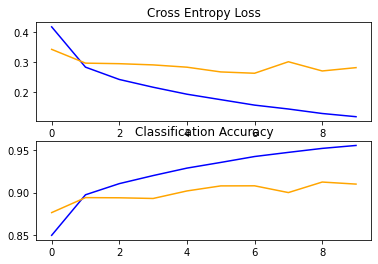

In [18]:
for i in range(len(histories)):
		# plot loss
		pyplot.subplot(211)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(212)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')

Accuracy: mean=86.170 std=0.000, n=1


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb0c6a0d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb0c66b850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb0c6a07d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb0c69e350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb0c69e850>],
 'means': []}

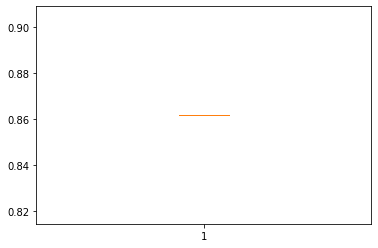

In [21]:

# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
pyplot.boxplot(scores)